<a href="https://colab.research.google.com/github/aratrika007/ML_Lab/blob/main/Assignment1_4_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment No.1 (Continued)**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder


In [ ]:
df = pd.read_csv('drive/MyDrive/ML_DRIVE/Assign_1/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
def mean_squared_error(y_true, y_pred):
    # Calculate the squared differences between true and predicted values
    squared_errors = (y_true - y_pred) ** 2

    # Calculate the mean of the squared differences
    mse = np.mean(squared_errors)

    return mse

# Model 1: LotFrontage, LotArea

In [ ]:
df1 = df[['LotFrontage','LotArea','SalePrice']]
df1.head()


,LotFrontage,LotArea,SalePrice
0,65.0,8450,208500
1,80.0,9600,181500
2,68.0,11250,223500
3,60.0,9550,140000
4,84.0,14260,250000


In [ ]:
df1.shape

(1460, 3)

In [ ]:
df1.isnull().sum()

LotFrontage    259
LotArea          0
SalePrice        0
dtype: int64

In [ ]:
df1.dropna(axis=0, inplace=True)
df1.shape

<ipython-input-9-85d2fc848886>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(axis=0, inplace=True)


(1201, 3)

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(df1[['LotFrontage','LotArea']], df1['SalePrice'], train_size = 0.8)
model1 = LinearRegression()
model1.fit(x_train1, y_train1)

LinearRegression()

In [ ]:
y_pred1 = model1.predict(x_test1)
r2_1= r2_score(y_test1,y_pred1)
print("R2 Score : ",r2_1)
print("Mean Squared Error : ",mean_squared_error(y_test1,y_pred1))

R2 Score :  0.09152565057794615
Mean Squared Error :  3636925171.421748


In [ ]:
slope1 = model1.coef_[0]
intercept1 = model1.intercept_

print("Slope:", slope1)
print("Intercept:", intercept1)

Slope: 928.215470023359
Intercept: 97496.85370543798


# Model 2: LotFrontage, LotArea, OverallQual, OverallCond

In [ ]:
df2 = df[['LotFrontage','LotArea','OverallQual','OverallCond','SalePrice']]
df2.head()

,LotFrontage,LotArea,OverallQual,OverallCond,SalePrice
0,65.0,8450,7,5,208500
1,80.0,9600,6,8,181500
2,68.0,11250,7,5,223500
3,60.0,9550,7,5,140000
4,84.0,14260,8,5,250000


In [ ]:
df2.shape

(1460, 5)

In [ ]:
df2.isnull().sum()

LotFrontage    259
LotArea          0
OverallQual      0
OverallCond      0
SalePrice        0
dtype: int64

In [ ]:
df2.dropna(axis=0,inplace=True)

<ipython-input-17-7cc6f020b4a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(axis=0,inplace=True)


In [ ]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(df2[['LotFrontage','LotArea','OverallQual','OverallCond']],df2['SalePrice'],train_size=0.8)
model2 = LinearRegression()
model2.fit(x_train2,y_train2)


LinearRegression()

In [ ]:
y_pred2 = model2.predict(x_test2)
r2_2= r2_score(y_test2,y_pred2)
print("R2 Score : ",r2_2)
print("Mean Squared Error : ",mean_squared_error(y_test2,y_pred2))

R2 Score :  0.5427044846317588
Mean Squared Error :  2790818933.860348


In [ ]:
slope2 = model2.coef_[0]
intercept2 = model2.intercept_

print("Slope:", slope2)
print("Intercept:", intercept2)

Slope: 618.7562093554718
Intercept: -146331.18535920093


# Model 3: LotFrontage, LotArea, OverallQual, OverallCond, 1stFlrSF, GrLivArea

In [ ]:
df3 = df[['LotFrontage','LotArea','OverallQual','OverallCond','1stFlrSF', 'GrLivArea','SalePrice']]
df3.head()


,LotFrontage,LotArea,OverallQual,OverallCond,1stFlrSF,GrLivArea,SalePrice
0,65.0,8450,7,5,856,1710,208500
1,80.0,9600,6,8,1262,1262,181500
2,68.0,11250,7,5,920,1786,223500
3,60.0,9550,7,5,961,1717,140000
4,84.0,14260,8,5,1145,2198,250000


In [ ]:
df3.shape

(1460, 7)

In [ ]:
df3.isnull().sum()

LotFrontage    259
LotArea          0
OverallQual      0
OverallCond      0
1stFlrSF         0
GrLivArea        0
SalePrice        0
dtype: int64

In [ ]:
df3=df3.dropna(axis=0)

In [ ]:
df3.shape

(1201, 7)

In [ ]:
x_train3,x_test3,y_train3,y_test3 = train_test_split(df3[['LotFrontage','LotArea','OverallQual','OverallCond','1stFlrSF', 'GrLivArea']],df3['SalePrice'],train_size=0.8)
model3 = LinearRegression()
model3.fit(x_train3,y_train3)

LinearRegression()

In [ ]:
y_pred3 = model3.predict(x_test3)
r2_3 = r2_score(y_test3, y_pred3)
print("R2 Score : ",r2_3)
print("Mean Squared Error : ",mean_squared_error(y_test3,y_pred3))

R2 Score :  0.7564207501411893
Mean Squared Error :  1796417377.532333


In [ ]:
slope3 = model3.coef_[0]
intercept3 = model3.intercept_

print("Slope:", slope3)
print("Intercept:", intercept3)

Slope: -52.87897620928976
Intercept: -125260.66005878459


# Model 4: LotArea, Street

In [ ]:
df4 = df[['LotArea','Street','SalePrice']]
df4.head()

,LotArea,Street,SalePrice
0,8450,Pave,208500
1,9600,Pave,181500
2,11250,Pave,223500
3,9550,Pave,140000
4,14260,Pave,250000


In [ ]:
df4.isnull().any()


LotArea      False
Street       False
SalePrice    False
dtype: bool

In [ ]:
df4['Street'].nunique()

2

In [ ]:
df4.shape

(1460, 3)

In [ ]:
df4['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [ ]:
# Select the column you want to one-hot encode
column_to_encode = 'Street'
column_data = df4[[column_to_encode]]
# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the selected column to perform one-hot encoding
one_hot_encoded = encoder.fit_transform(column_data)
# The result of one-hot encoding is a sparse matrix. You can convert it to a dense array or DataFrame if needed.
# For example, to convert to a dense array:
one_hot_encoded_array = one_hot_encoded.toarray()
# Or, to convert to a DataFrame with appropriate column names:
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_array, columns=encoder.get_feature_names_out([column_to_encode]))

# Concatenate the one-hot encoded DataFrame with the original DataFrame, dropping the original column
df4 = pd.concat([df4.drop(columns=[column_to_encode]), one_hot_encoded_df], axis=1)

df4.head()

,LotArea,SalePrice,Street_Grvl,Street_Pave
0,8450,208500,0.0,1.0
1,9600,181500,0.0,1.0
2,11250,223500,0.0,1.0
3,9550,140000,0.0,1.0
4,14260,250000,0.0,1.0


In [ ]:
df4.shape

(1460, 4)

In [ ]:
df4.isnull().any()

LotArea        False
SalePrice      False
Street_Grvl    False
Street_Pave    False
dtype: bool

In [ ]:
df4.isnull().sum()

LotArea        0
SalePrice      0
Street_Grvl    0
Street_Pave    0
dtype: int64

In [ ]:
x_train4,x_test4,y_train4,y_test4 = train_test_split(df4[['LotArea','Street_Grvl','Street_Pave']],df4['SalePrice'],train_size=0.8)
model4 = LinearRegression()
model4.fit(x_train4,y_train4)

LinearRegression()

In [ ]:
y_pred4 = model4.predict(x_test4)
r2_4 = r2_score(y_test4,y_pred4)
print("R2 Score : ",r2_4)
print("Mean Squared Error : ",mean_squared_error(y_test4,y_pred4))

R2 Score :  0.08821175839192075
Mean Squared Error :  6207939293.559356


In [ ]:
slope4 = model4.coef_[0]
intercept4 = model4.intercept_

print("Slope:", slope4)
print("Intercept:", intercept4)

Slope: 2.0036418605650756
Intercept: 98349.50575305638


# Model 5: LotArea, OverallCond, Street, Neighborhood

In [ ]:
df5 = df[['LotArea','Street','OverallCond','Neighborhood','SalePrice']]
df5.head()

,LotArea,Street,OverallCond,Neighborhood,SalePrice
0,8450,Pave,5,CollgCr,208500
1,9600,Pave,8,Veenker,181500
2,11250,Pave,5,CollgCr,223500
3,9550,Pave,5,Crawfor,140000
4,14260,Pave,5,NoRidge,250000


In [ ]:
df5['Neighborhood'].nunique()

25

In [ ]:
df5.shape

(1460, 5)

In [ ]:
# Select the column you want to one-hot encode
column_to_encode = 'Neighborhood'
column_data = df5[[column_to_encode]]
# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the selected column to perform one-hot encoding
one_hot_encoded = encoder.fit_transform(column_data)
# The result of one-hot encoding is a sparse matrix. You can convert it to a dense array or DataFrame if needed.
# For example, to convert to a dense array:
one_hot_encoded_array = one_hot_encoded.toarray()
# Or, to convert to a DataFrame with appropriate column names:
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_array, columns=encoder.get_feature_names_out([column_to_encode]))

# Concatenate the one-hot encoded DataFrame with the original DataFrame, dropping the original column
df5 = pd.concat([df5.drop(columns=[column_to_encode]), one_hot_encoded_df], axis=1)

df5.head()

,LotArea,Street,OverallCond,SalePrice,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,8450,Pave,5,208500,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9600,Pave,8,181500,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,11250,Pave,5,223500,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9550,Pave,5,140000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14260,Pave,5,250000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
column_to_encode = 'Street'
column_data = df5[[column_to_encode]]
one_hot_encoded = encoder.fit_transform(column_data)
one_hot_encoded_array = one_hot_encoded.toarray()
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_array, columns=encoder.get_feature_names_out([column_to_encode]))
df5 = pd.concat([df5.drop(columns=[column_to_encode]), one_hot_encoded_df], axis=1)
df5.head()

,LotArea,OverallCond,SalePrice,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Street_Grvl,Street_Pave
0,8450,5,208500,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,9600,8,181500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11250,5,223500,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,9550,5,140000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,14260,5,250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
target = df5['SalePrice']
df5 = df5.drop(['SalePrice'],axis=1)

In [ ]:
df5.head()

,LotArea,OverallCond,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Street_Grvl,Street_Pave
0,8450,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,9600,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11250,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,9550,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,14260,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
target

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [ ]:
x_train5,x_test5,y_train5,y_test5 = train_test_split(df5,target,train_size=0.8)
model5 = LinearRegression()
model5.fit(x_train5,y_train5)

LinearRegression()

In [ ]:
y_pred5 = model5.predict(x_test5)
r2_5 = r2_score(y_test5, y_pred5)
print("R2 Score : ",r2_5)
print("Mean Squared Error : ",mean_squared_error(y_test5,y_pred5))

R2 Score :  0.5291737236190452
Mean Squared Error :  3524458988.2375174


In [ ]:
slope5 = model5.coef_[0]
intercept5 = model5.intercept_

print("Slope:", slope5)
print("Intercept:", intercept5)

Slope: 1.669121522166659
Intercept: 95800.3554994012


# Model 6: LotArea, OverallCond, Street, 1stFlrSF, Neighborhood, Year

In [ ]:
df6 = df[['LotArea','OverallCond', 'Street', '1stFlrSF', 'Neighborhood','SalePrice']]
df6.head()

,LotArea,OverallCond,Street,1stFlrSF,Neighborhood,SalePrice
0,8450,5,Pave,856,CollgCr,208500
1,9600,8,Pave,1262,Veenker,181500
2,11250,5,Pave,920,CollgCr,223500
3,9550,5,Pave,961,Crawfor,140000
4,14260,5,Pave,1145,NoRidge,250000


In [ ]:
# Select the column you want to one-hot encode
column_to_encode = 'Neighborhood'
column_data = df6[[column_to_encode]]
# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the selected column to perform one-hot encoding
one_hot_encoded = encoder.fit_transform(column_data)
# The result of one-hot encoding is a sparse matrix. You can convert it to a dense array or DataFrame if needed.
# For example, to convert to a dense array:
one_hot_encoded_array = one_hot_encoded.toarray()
# Or, to convert to a DataFrame with appropriate column names:
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_array, columns=encoder.get_feature_names_out([column_to_encode]))

# Concatenate the one-hot encoded DataFrame with the original DataFrame, dropping the original column
df6 = pd.concat([df6.drop(columns=[column_to_encode]), one_hot_encoded_df], axis=1)

df6.head()

,LotArea,OverallCond,Street,1stFlrSF,SalePrice,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,8450,5,Pave,856,208500,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9600,8,Pave,1262,181500,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,11250,5,Pave,920,223500,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9550,5,Pave,961,140000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14260,5,Pave,1145,250000,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
column_to_encode = 'Street'
column_data = df6[[column_to_encode]]
one_hot_encoded = encoder.fit_transform(column_data)
one_hot_encoded_array = one_hot_encoded.toarray()
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_array, columns=encoder.get_feature_names_out([column_to_encode]))
df6 = pd.concat([df6.drop(columns=[column_to_encode]), one_hot_encoded_df], axis=1)
df6.head()

,LotArea,OverallCond,1stFlrSF,SalePrice,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Street_Grvl,Street_Pave
0,8450,5,856,208500,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,9600,8,1262,181500,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11250,5,920,223500,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,9550,5,961,140000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,14260,5,1145,250000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
target6 = df6['SalePrice']
df6 = df6.drop(['SalePrice'],axis=1)
x_train6,x_test6,y_train6,y_test6 = train_test_split(df6,target6,train_size=0.8)
model6 = LinearRegression()
model6.fit(x_train6,y_train6)

LinearRegression()

In [ ]:
y_pred6 = model6.predict(x_test6)
r2_6 = r2_score(y_test6,y_pred6)
print("R2 Score: ",r2_6)
print("Mean Squared Error : ",mean_squared_error(y_test6,y_pred6))

R2 Score:  0.6363597228960458
Mean Squared Error :  1908880839.1934154


In [ ]:
slope6 = model6.coef_[0]
intercept6 = model6.intercept_

print("Slope:", slope6)
print("Intercept:", intercept6)

Slope: 0.795962058829501
Intercept: 8839.396577346313


# Comparing the feature “LotArea” weights/coefficients for all the six trained models and ploting a graph

In [ ]:
c1 = model1.coef_[1]
c2 = model2.coef_[1]
c3 = model3.coef_[1]
c4 = model4.coef_[0]
c5 = model5.coef_[0]
c6 = model6.coef_[0]

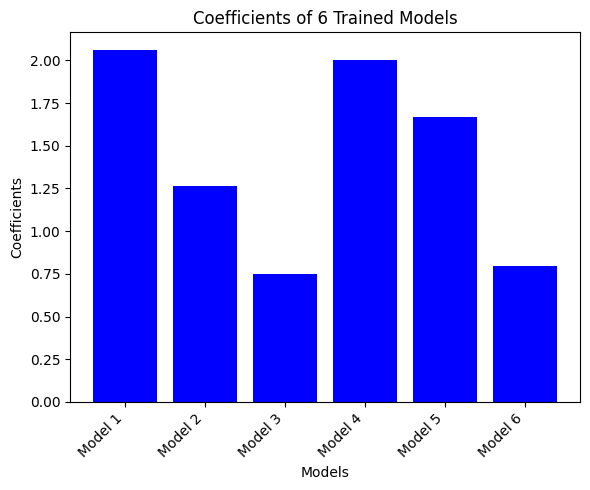

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have 6 coefficients stored in a list or array called 'coefficients'
coefficients = [c1,c2,c3,c4,c5,c6]

# Names of the features (optional, just for labeling the bars)
feature_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6']

# Plot the coefficients using a bar plot
plt.figure(figsize=(6, 5))
plt.bar(range(len(coefficients)), coefficients, tick_label=feature_names, color='blue')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)  # Add a horizontal line at y=0
plt.xlabel('Models')
plt.ylabel('Coefficients')
plt.title('Coefficients of 6 Trained Models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

## **Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
df7 = df[['LotArea','SalePrice']]
df7.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In [ ]:
x = df7['LotArea']
y = df7['SalePrice']
x = np.array(x).reshape(-1,1)
# Polynomial regression with degree 2
poly_features = PolynomialFeatures(degree=2)
x_poly2 = poly_features.fit_transform(x)
x_train7,x_test7,y_train7,y_test7 = train_test_split(x_poly2,y,train_size=0.8)

In [ ]:
model7 = LinearRegression()
model7.fit(x_train7, y_train7)

LinearRegression()

In [ ]:
# Predict the values using the model
y_pred7 = model7.predict(x_test7)

In [ ]:
x_train7
y_pred7 = model7.predict(x_test7)
r2_7 = r2_score(y_test7,y_pred7)
print("R2 Score: ",r2_7)
print("Mean Squared Error : ",mean_squared_error(y_test7,y_pred7))

R2 Score:  0.11024307230302
Mean Squared Error :  5996011001.675999


In [ ]:
df8 = df[['LotArea','SalePrice']]
df8.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In [ ]:
x = df8['LotArea']
y = df8['SalePrice']
x = np.array(x).reshape(-1,1)
# Polynomial regression with degree 3
poly_features = PolynomialFeatures(degree=3)
x_poly3 = poly_features.fit_transform(x)
x_train8,x_test8,y_train8,y_test8= train_test_split(x_poly3,y,train_size=0.8)


model8 = LinearRegression()
model8.fit(x_train8, y_train8)

LinearRegression()

In [ ]:
# Predict the values using the model
y_pred8 = model8.predict(x_test8)
r2_8 = r2_score(y_test8,y_pred8)
print("R2 Score: ",r2_8)
print("Mean Squared Error : ",mean_squared_error(y_test8,y_pred8))

R2 Score:  0.1709570485374743
Mean Squared Error :  4900501183.302982
